In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, levene, wilcoxon, mannwhitneyu, kruskal, spearmanr, ttest_ind
import scipy as sp
import scikit_posthocs as sp
from scikit_posthocs import posthoc_conover, posthoc_mannwhitney
import statistics
import matplotlib.pyplot as plt
import matplotlib_inline
from sklearn.preprocessing import label_binarize, LabelEncoder

In [4]:
full_db = pd.read_csv('db_new.csv')
X = pd.read_csv('X_scaled.csv')

#full_db.drop(columns='Unnamed: 0', inplace=True)
full_db

#X_test.info()
X

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0000,0.0,1.0,0.177171,0.563636,0.272727,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.6750,0.0,0.0,0.202031,0.563636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.3500,0.0,0.0,0.202031,0.400000,0.354545,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.4500,0.0,0.0,0.156863,0.272727,0.340909,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.9500,1.0,1.0,0.118231,0.236364,0.340909,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0000,0.0,0.0,0.202031,0.490909,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0250,0.0,0.0,0.085901,0.545455,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.8250,0.0,0.0,0.207983,0.400000,0.340909,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99998,0.3000,0.0,0.0,0.296569,0.090909,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:

def check_norm(data):
    stats, p = shapiro(data)
    print("Stats is:%.4f" % stats, "P_value is:%.4f" % p)
    if p > 0.5:
        print('Normal - Fail to reject Ho')
    else:
        print('Not normal - Reject Ho')    


check_norm(X['bmi']);

def check_homo_gen(var, var1):
    stats, p = levene(var, var1)
    print('Stats is: %.2f' % stats, 'P_value is: %.4f' % p)
    if p > 0.5:
        print('No variance - Fail to reject Ho')
    else:
        print('Variance - Reject Ho')   
      

In [4]:
check_norm(X['bmi']);
check_homo_gen(X['gender_Male'], X['bmi']);

Stats is:0.9255 P_value is:0.0000
Not normal - Reject Ho
Stats is: 53486.18 P_value is: 0.0000
Variance - Reject Ho


In [5]:
X.columns 

#X.heart_disease.mean(), X.bmi.mean()

Male = X[X['gender_Male']==1]

female = X[X['gender_Male']==0]



def avg_diff(var1, var2):
    stats, p = mannwhitneyu(var1,var2)
    print('Stats is: %.4f' % stats, 'P_value is: %.4f' % p)
    
    if p > 0.5:
        print('No difference - Fail to rject Ho')
    else:
        print('Difference - Reject Ho')    

avg_diff(Male['blood_glucose_level'],female['blood_glucose_level'])

Stats is: 1229555252.0000 P_value is: 0.0003
Difference - Reject Ho


In [15]:

lb = LabelEncoder()

full_db['EnCded_SmkH'] = lb.fit_transform(full_db['smoking_history'])

#full_db.drop(columns=['new'], inplace=True)

#full_db.groupby(['smoking_history']).mean()

db_si = full_db.iloc[:,1:10]

db_si.groupby(['smoking_history']).mean()


,age,hypertension,heart_disease,diabetes,HbA1c_level_Out,bmi_out,blood_glucose_level_Out,EnCded_SmkH
smoking_history,,,,,,,,
No Info,33.511838,0.033560,0.025771,0.040596,5.460641,25.297290,133.783707,0.0
current,44.063429,0.089597,0.044045,0.102089,5.545139,28.351815,135.792533,1.0
ever,49.136863,0.104645,0.078172,0.117882,5.575356,28.693228,135.727224,2.0
former,57.061698,0.143178,0.097092,0.170017,5.647905,29.516052,137.551704,3.0
never,43.889471,0.091295,0.031258,0.095341,5.540719,28.017462,135.633869,4.0
not current,47.688382,0.075849,0.045292,0.107027,5.564667,28.135259,135.454572,5.0


In [80]:
# a = full_db[['age', 'HbA1c_level_Out', 'bmi_out', 'smoking_history']]

# b = a.groupby(['smoking_history']).sum().reset_index()

# full_db

kruskal(full_db['heart_disease'], full_db['blood_glucose_level_Out'])

full_db['smoking_history'].value_counts()
current = X[(X['smoking_history_current']==1) & (X['heart_disease']==1)]
ever = X[X['smoking_history_ever']==1]
ever = X[(X['smoking_history_ever'] ==1) & (X['heart_disease']==1)]
former = X[(X['smoking_history_former']== 1) & (X['heart_disease'] == 1)]

kruskal(full_db['smoking_history'], full_db['blood_glucose_level_Out'])

,smoking_history,age,HbA1c_level_Out,bmi_out
0,No Info,1200260.0,195578.334644,906047.746154
1,current,409173.0,51492.163247,263274.957490
2,ever,196744.0,22323.724722,114887.684806
3,former,533641.0,52819.211307,276034.116654
4,never,1540301.0,194451.533534,983272.838956
5,not current,307447.0,35875.405653,181388.011791


In [16]:
ever = full_db[full_db['smoking_history']=='ever']
current = full_db[full_db['smoking_history']=='current']
former = full_db[full_db['smoking_history']=='former']
no_Info = full_db[full_db['smoking_history'] =='No Info']


def check_groups(**kwargs):
    state, p = kruskal(ever['blood_glucose_level_Out'], former['blood_glucose_level_Out'], current['blood_glucose_level_Out'], no_Info['blood_glucose_level_Out'])
    

In [17]:
def check_groups(*kwargs):
    state, p = kruskal(*kwargs)
    print('stats is: {0:.4f} and p is:{1:0.4f} '.format(state, p))
    Alpha = 0.5
    if p > Alpha:
        print('Fail to reject Ho')
    else:
        print('Reject Ho')    
    

    
check_groups(ever['blood_glucose_level_Out'], former['blood_glucose_level_Out'],current['blood_glucose_level_Out'], no_Info['blood_glucose_level_Out']) 



ks_pos_hoc = posthoc_conover([ever['blood_glucose_level_Out'], former['blood_glucose_level_Out'], current['blood_glucose_level_Out'], no_Info['blood_glucose_level_Out']], p_adjust='holm')

ks_pos_hoc.columns = ['Ever', 'Former', 'Current', 'No_info']
ks_pos_hoc.index = ['Ever', 'Former', 'Current', 'No_info']
ks_pos_hoc.style.applymap(lambda x: 'background-color: white' if x > 0.5 else 'background-color: green')


#Ks_Manwhi = posthoc_mannwhitney([Ever['blood_glucose_level_Out'], Former['blood_glucose_level_Out'], Current['blood_glucose_level_Out'], No_Info['blood_glucose_level_Out']], p_adjust='bonferroni')



stats is: 56.9014 and p is:0.0000 
Reject Ho


,Ever,Former,Current,No_info
Ever,1.000000,0.151099,0.941218,0.019237
Former,0.151099,1.000000,0.051082,0.000000
Current,0.941218,0.051082,1.000000,0.000453
No_info,0.019237,0.000000,0.000453,1.000000


Stats is: 0.0583 and P_value is: 0.0000
Accept Ho - No correlation 0.0583
Stats is: 0.0836 and P_value is: 0.0000
Accept Ho - No correlation 0.0836


Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'gender_Male', 'gender_Other',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

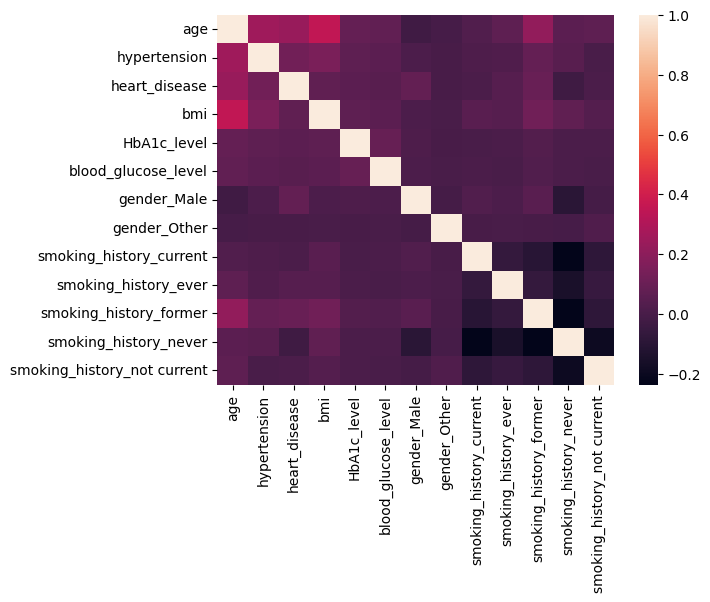

In [28]:
X.columns

sns.heatmap(X.corr(method='spearman')) 
all_corr = X.corr(method='spearman')
all_corr.style.applymap(lambda x: 'background-color: blue' if x > 0.2  else 'background-color:yellow')


stats, p = spearmanr(X['blood_glucose_level'], X['bmi'])

_
def spear_corr(var1, var2):
    stats, p = spearmanr(var1, var2)
    print('Stats is: {0:.4f} and P_value is: {1:.4f}'.format(stats,p))
    if p > 0.5:
        print('Fail to Reject Ho - Correlation %.4f'% stats)
    else:
        print('Accept Ho - No correlation %.4f'% stats)    
    
    

spear_corr(X['blood_glucose_level'], X['bmi'])
spear_corr(X['age'], X.HbA1c_level)
X.columns


In [54]:
X['heart_disease'].value_counts()

heart_disease
0.0    96058
1.0     3942
Name: count, dtype: int64

In [6]:
#sns.histplot(X['blood_glucose_level'])
#np.log(full_db['HbA1c_level_Out'])

#np.sqrt()
#np.cbrt
#sns.histplot(X['blood_glucose_level'])
#check_norm(X['blood_glucose_level']);


X['Blood_GL'] = np.log(X['blood_glucose_level'])
sns.histplot(X['Blood_GL'])
check_norm(X['Blood_GL']);
Heart_D = X[X['heart_disease'] == 1]
Not_Heart_D = X[X['heart_disease'] == 0]


check_homo_gen(Heart_D['Blood_GL'], Not_Heart_D['Blood_GL']);
statistics.variance(Heart_D['Blood_GL']), statistics.variance(Not_Heart_D['Blood_GL'])


In [9]:
def avg_test(var1, var2):
    stat, p = ttest_ind(var1, var2)
    print('stats is{0:.4f} and p is {1:.4f}')
    if p > 0.5:
        print('No difference %.3f'% stat)
    else:
        print('Difference %.3f' % p)    